In [46]:
#Librerias EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [38]:
from scipy import stats

**Importación de la base de datos**

In [2]:
datos = pd.read_csv('Walmart.csv')

In [3]:
descriptivos = datos.describe()
print(descriptivos)

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price   
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000  \
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


Reemplazamos los nombres de las columnas a español:

**Recodificar el nombre de las columnas a español**

In [24]:
#Recodificar nombres a español
datos.rename({'Store':'Tienda','Weekly_Sales':'Ventas_semanales','Holiday_Flag':'Vacaciones','Close':'Precio_cierre','Temperature':'Temperatura','Fuel_Price':'Precio_combustible','Unemployment':'Desempleo'},inplace=True,axis=1)
print(descriptivos)

            Tienda  Ventas_semanales   Vacaciones  Temperatura   
count  6435.000000      6.435000e+03  6435.000000  6435.000000  \
mean     23.000000      1.046965e+06     0.069930    60.663782   
std      12.988182      5.643666e+05     0.255049    18.444933   
min       1.000000      2.099862e+05     0.000000    -2.060000   
25%      12.000000      5.533501e+05     0.000000    47.460000   
50%      23.000000      9.607460e+05     0.000000    62.670000   
75%      34.000000      1.420159e+06     0.000000    74.940000   
max      45.000000      3.818686e+06     1.000000   100.140000   

       Precio_combustible          CPI    Desempleo  
count         6435.000000  6435.000000  6435.000000  
mean             3.358607   171.578394     7.999151  
std              0.459020    39.356712     1.875885  
min              2.472000   126.064000     3.879000  
25%              2.933000   131.735000     6.891000  
50%              3.445000   182.616521     7.874000  
75%              3.735000  

**Variables numéricas y categóricas**

In [25]:
tipos_variables = datos.dtypes

# Identificar variables numéricas
variables_numericas = tipos_variables[tipos_variables != 'object'].index.tolist()

# Identificar variables categóricas
variables_categoricas = tipos_variables[tipos_variables == 'object'].index.tolist()

# Mostrar las variables numéricas y categóricas
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

Variables numéricas: ['Tienda', 'Ventas_semanales', 'Vacaciones', 'Temperatura', 'Precio_combustible', 'CPI', 'Desempleo']
Variables categóricas: ['Date']


Para la variable "Vacaciones", la media es de aproximadamente 0.07, lo que indica que en promedio hay una proporción baja de semanas con vacaciones.
La variable "Temperatura" tiene un rango de -2.06 a 100.14, lo que indica una amplia variabilidad en los datos de temperatura.
La variable "Desempleo" tiene una media de aproximadamente 8, lo que sugiere una tasa de desempleo relativamente alta en general.
Para las variables numéricas, hay una diferencia notable entre los valores mínimos y máximos, lo que indica una amplia dispersión de datos.

**Evaluación de la base para datos perdidos**

In [26]:
datos_perdidos = datos.isnull().sum()
# Mostrar la cantidad de datos perdidos por columna
print(datos_perdidos)

Tienda                0
Date                  0
Ventas_semanales      0
Vacaciones            0
Temperatura           0
Precio_combustible    0
CPI                   0
Desempleo             0
dtype: int64


**Datos atípicos (outliers)**

Para evaluar si alguna de las variables contiene datos atípicos (outliers) en base a los descriptivos resumen proporcionados, podemos utilizar el método de los valores atípicos basado en los estadísticos de Tukey.

Los estadísticos de Tukey se calculan utilizando el rango intercuartílico (IQR), que es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1) de los datos. Generalmente, se considera que un valor es un outlier si está por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR.

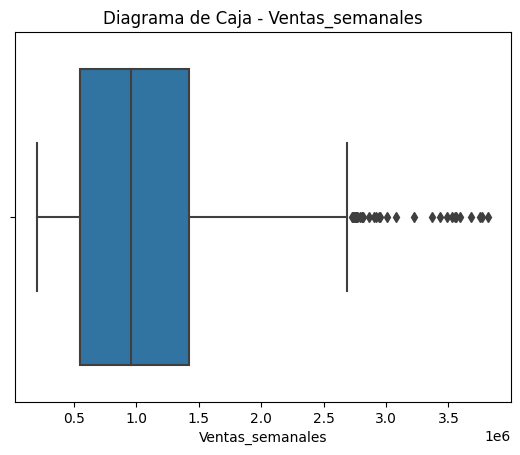

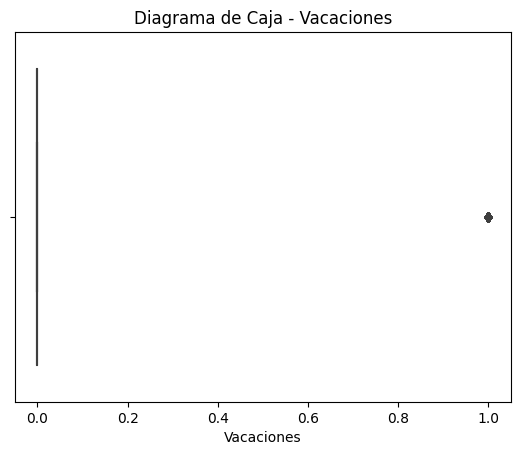

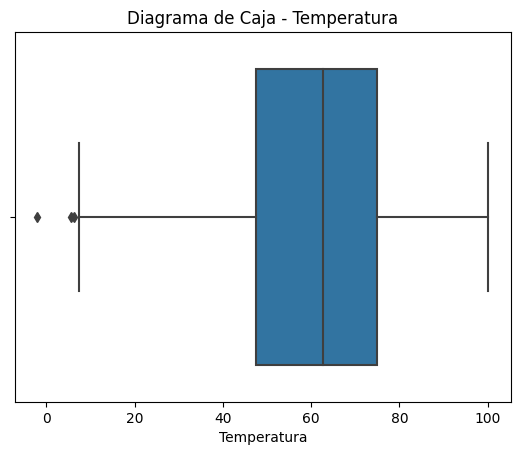

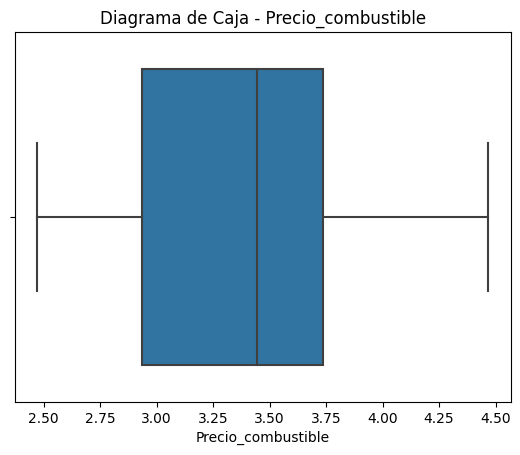

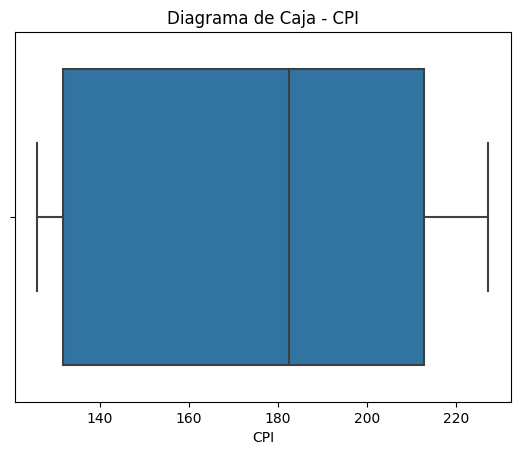

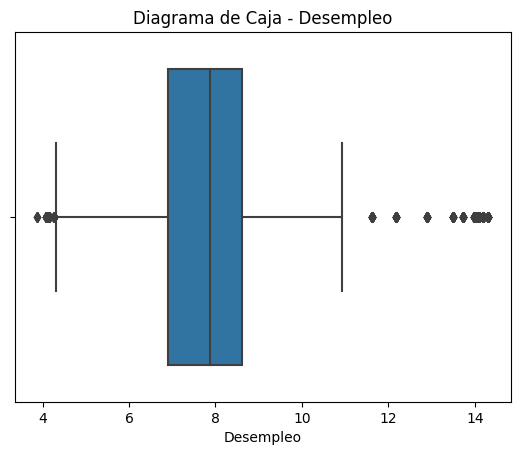

Filas con outliers:
      Tienda        Date  Ventas_semanales  Vacaciones  Temperatura   
1          1  12-02-2010        1641957.44           1        38.51  \
31         1  10-09-2010        1507460.69           1        78.69   
42         1  26-11-2010        1955624.11           1        64.52   
47         1  31-12-2010        1367320.01           1        48.43   
53         1  11-02-2011        1649614.93           1        36.39   
...      ...         ...               ...         ...          ...   
6375      45  09-09-2011         746129.56           1        71.48   
6386      45  25-11-2011        1170672.94           1        48.71   
6391      45  30-12-2011         869403.63           1        37.79   
6397      45  10-02-2012         803657.12           1        37.00   
6427      45  07-09-2012         766512.66           1        75.70   

      Precio_combustible         CPI  Desempleo  
1                  2.548  211.242170      8.106  
31                 2.565  2

In [44]:
columnas_num = ['Ventas_semanales', 'Vacaciones', 'Temperatura', 'Precio_combustible', 'CPI', 'Desempleo']

# Crear diagramas de caja para cada variable
for col in columnas_num:
    sns.boxplot(x=datos[col])
    plt.title('Diagrama de Caja - {}'.format(col))
    plt.show()

# Calcular los estadísticos de Tukey para identificar outliers
Q1 = datos[columnas_num].quantile(0.25)
Q3 = datos[columnas_num].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar outliers
rango_outliers = 1.5

# Identificar los outliers en cada variable
outliers = ((datos[columnas_num] < (Q1 - rango_outliers * IQR)) | (datos[columnas_num] > (Q3 + rango_outliers * IQR))).any(axis=1)

# Mostrar las filas que contienen outliers
filas_con_outliers = datos[outliers]
print("Filas con outliers:")
print(filas_con_outliers)

**Distribuciones de las variables**

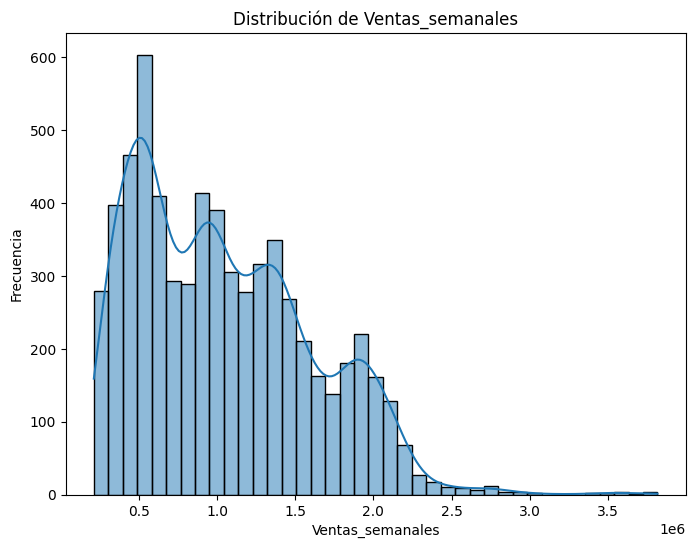

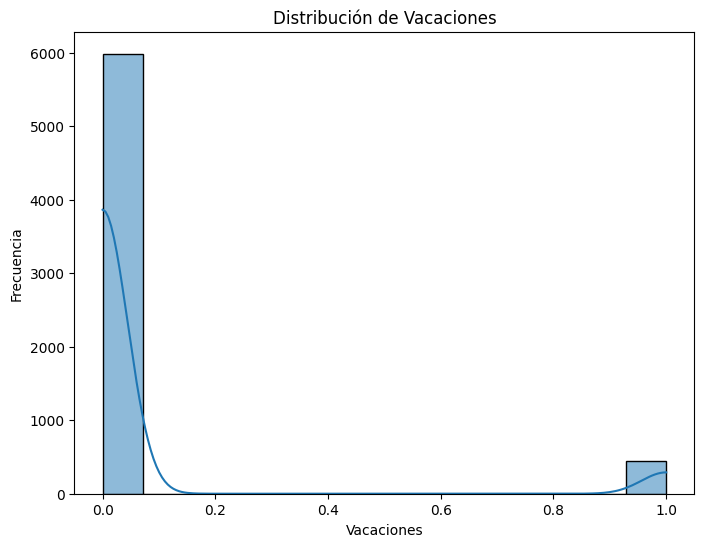

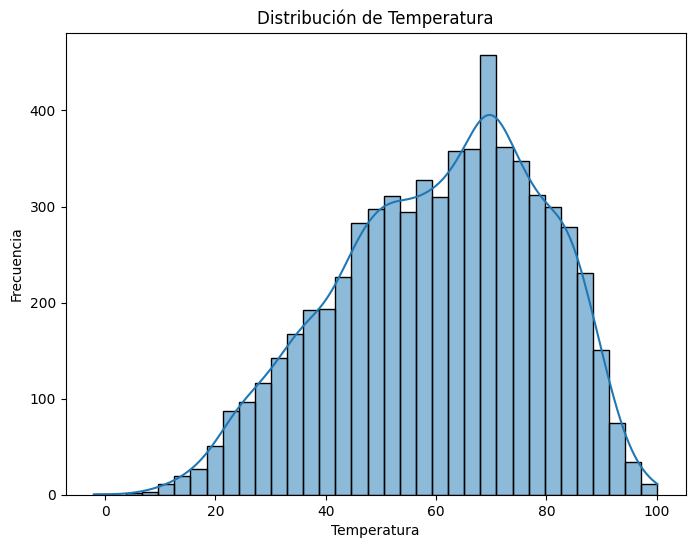

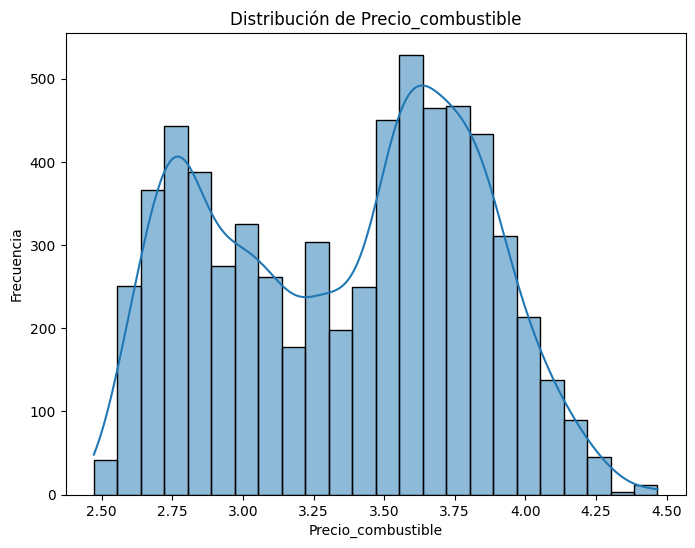

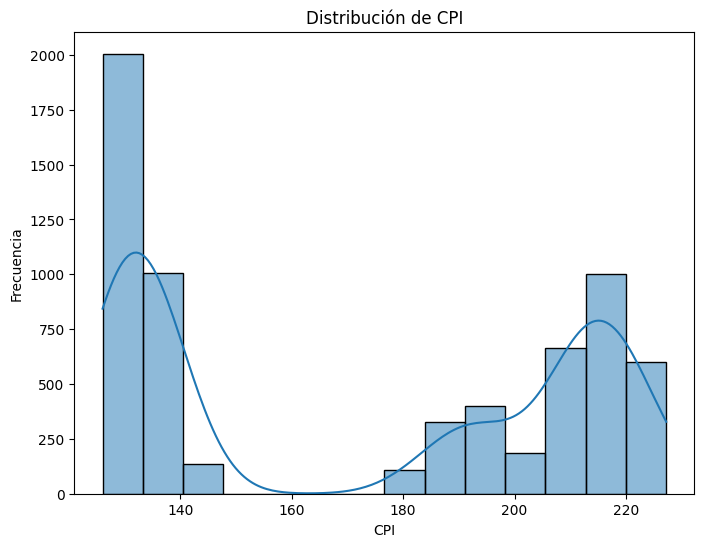

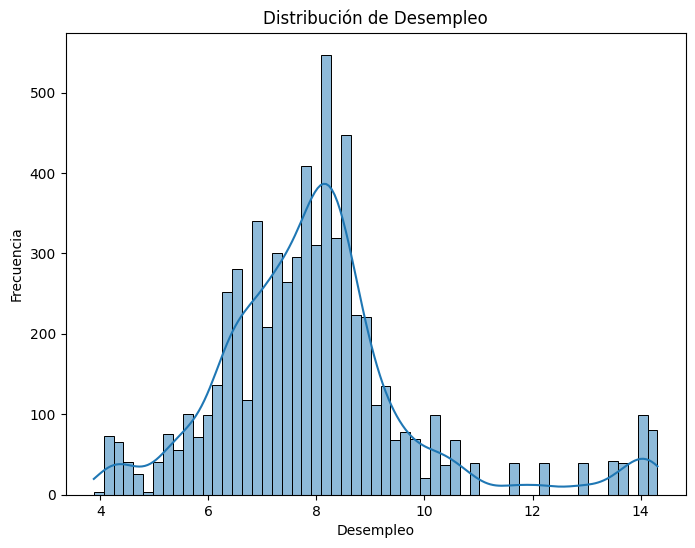

In [45]:
columnas_num = ['Ventas_semanales', 'Vacaciones', 'Temperatura', 'Precio_combustible', 'CPI', 'Desempleo']

# Graficar histogramas y gráficos de densidad para cada variable
for col in columnas_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=datos, x=col, kde=True)
    plt.title('Distribución de {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

Al observar las distribuciones, es importante tener en cuenta lo siguiente:

Ventas_semanales: La distribución de las ventas semanales puede seguir una forma normal o tener una asimetría hacia la izquierda o la derecha. Podemos observar si hay una concentración de valores en un rango particular y si hay valores extremos.

Vacaciones: La variable binaria de vacaciones puede mostrar una distribución desequilibrada si hay más semanas sin vacaciones que con vacaciones.

Temperatura: La distribución de la temperatura puede variar dependiendo del rango de temperaturas presentes en los datos. Podemos observar si sigue una forma normal o si hay una asimetría hacia la izquierda o la derecha.

Precio_combustible: La distribución del precio del combustible puede mostrar una forma normal o una distribución asimétrica, dependiendo de los datos. Podemos observar si hay valores extremos o concentraciones en rangos particulares.

CPI (Índice de Precios al Consumidor): La distribución del CPI puede seguir una forma normal o tener una asimetría hacia la izquierda o la derecha. Podemos observar si hay valores extremos o concentraciones en rangos particulares.

Desempleo: La distribución de la tasa de desempleo puede variar dependiendo de los datos. Podemos observar si sigue una forma normal o si hay una asimetría hacia la izquierda o la derecha.

**Correlaciones entre los datos de corte numérico**

In [29]:
variables_numericas = datos.select_dtypes(include='number')
correlaciones = variables_numericas.corr()

# Mostrar la matriz de correlación
print(correlaciones)

                          Tienda  Ventas_semanales    Vacaciones  Temperatura   
Tienda              1.000000e+00         -0.335332 -4.386841e-16    -0.022659  \
Ventas_semanales   -3.353320e-01          1.000000  3.689097e-02    -0.063810   
Vacaciones         -4.386841e-16          0.036891  1.000000e+00    -0.155091   
Temperatura        -2.265908e-02         -0.063810 -1.550913e-01     1.000000   
Precio_combustible  6.002295e-02          0.009464 -7.834652e-02     0.144982   
CPI                -2.094919e-01         -0.072634 -2.162091e-03     0.176888   
Desempleo           2.235313e-01         -0.106176  1.096028e-02     0.101158   

                    Precio_combustible       CPI  Desempleo  
Tienda                        0.060023 -0.209492   0.223531  
Ventas_semanales              0.009464 -0.072634  -0.106176  
Vacaciones                   -0.078347 -0.002162   0.010960  
Temperatura                   0.144982  0.176888   0.101158  
Precio_combustible            1.000000 -0

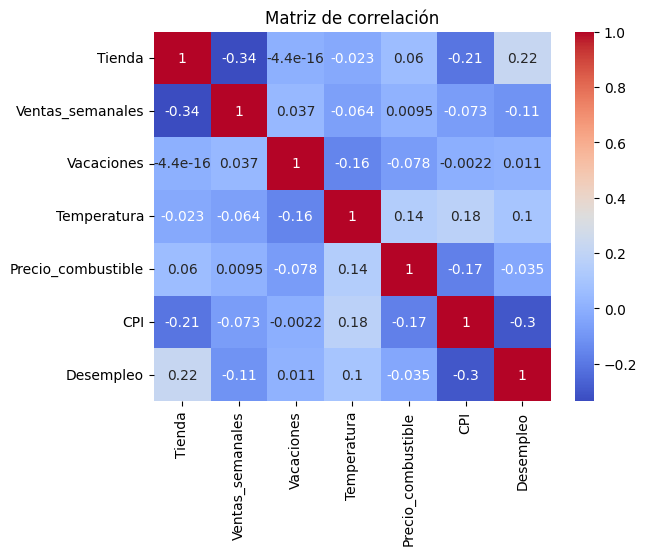

In [33]:
# Crear mapa de calor de las correlaciones
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

 El mapa de calor proporciona una visualización más intuitiva y fácil de interpretar de las correlaciones entre las variables numéricas.

**Variable dependiente**

En este caso, la variable "Ventas_semanales" parece ser una buena opción para la variable dependiente, ya que es probable que estemos interesados en analizar y predecir las ventas semanales de las tiendas. Por lo tanto, "Ventas_semanales" sería nuestra variable de respuesta o variable objetivo.

En cuanto a las variables independientes que podríamos introducir en el modelo, podemos considerar las siguientes variables:

"Vacaciones": Esta variable podría tener un impacto en las ventas semanales, ya que los períodos de vacaciones pueden influir en el comportamiento de compra de los consumidores.

"Temperatura": La temperatura también puede afectar las ventas, especialmente si se trata de productos estacionales o si el clima influye en la demanda de ciertos productos.

"Precio_combustible": El precio del combustible puede influir en los patrones de compra de los consumidores, especialmente en productos relacionados con el transporte o aquellos que tienen costos de distribución asociados.

"CPI": El índice de precios al consumidor (CPI) podría considerarse como un indicador general de la inflación y el poder adquisitivo de los consumidores, lo cual puede afectar las ventas.

"Desempleo": La tasa de desempleo también puede ser relevante, ya que puede influir en la disponibilidad de ingresos y el comportamiento de compra de los consumidores.

**Tipo de modelación**

El tipo de modelación a realizar dependerá de la naturaleza de los datos y del objetivo del análisis.Considerando que la variable dependiente es "Ventas_semanales", podemos sugerir un enfoque de modelación de regresión.

La regresión es adecuada cuando queremos analizar la relación entre una variable dependiente continua (en este caso, las ventas semanales) y varias variables independientes (como "Vacaciones", "Temperatura", "Precio_combustible", "CPI" y "Desempleo") que pueden influir en la variable dependiente. El objetivo es encontrar una función o modelo que describa la relación entre estas variables y permita predecir o estimar las ventas semanales en función de los valores de las variables independientes.

Un enfoque común en la regresión es utilizar la regresión lineal, que asume una relación lineal entre las variables independientes y la variable dependiente. Sin embargo, también se pueden explorar otros modelos de regresión más complejos, como la regresión polinómica, la regresión de árbol de decisiones o la regresión de máquinas de soporte vectorial, según las características y los patrones presentes en los datos.

**Verificación de los supuestos**

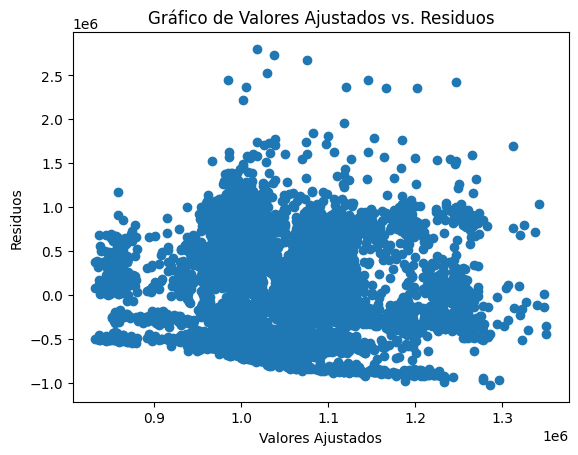

In [36]:
X = datos[['Vacaciones', 'Temperatura', 'Precio_combustible', 'CPI', 'Desempleo']]
y = datos['Ventas_semanales']

# Añadir una constante al conjunto de variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los residuos
residuos = modelo.resid

# Graficar los valores ajustados versus los residuos
plt.scatter(modelo.fittedvalues, residuos)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Valores Ajustados vs. Residuos')
plt.show()

Si la relación es lineal, los residuos deberían estar distribuidos de manera aleatoria y no debería haber un patrón discernible en el gráfico.

C:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Valor p del test de Shapiro-Wilk: 1.2411440628371337e-40


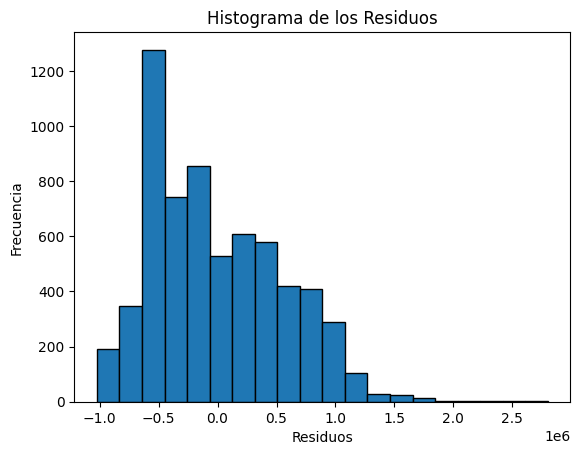

In [39]:
# Realizar la prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Valor p del test de Shapiro-Wilk:", shapiro_test.pvalue)

# Graficar un histograma de los residuos
plt.hist(residuos, bins=20, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos')
plt.show()

Si los residuos siguen una distribución normal, el valor p del test de Shapiro-Wilk debería ser mayor que un nivel de significancia elegido y el histograma debería mostrar una forma de campana simétrica.

**Modelo definitivo**

In [41]:
X = datos[['Vacaciones', 'Temperatura', 'Precio_combustible', 'CPI', 'Desempleo']]
y = datos['Ventas_semanales']

# Añadir una constante al conjunto de variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Hacer predicciones utilizando el modelo ajustado
predicciones = modelo.predict(X)

# Obtener los coeficientes y estadísticas del modelo
coeficientes = modelo.params
resumen_modelo = modelo.summary()

# Imprimir los coeficientes y el resumen del modelo
print("Coeficientes del modelo:")
print(coeficientes)
print("\nResumen del modelo:")
print(resumen_modelo)

Coeficientes del modelo:
const                 1.726523e+06
Vacaciones            7.489166e+04
Temperatura          -7.241715e+02
Precio_combustible   -1.016788e+04
CPI                  -1.598872e+03
Desempleo            -4.155228e+04
dtype: float64

Resumen del modelo:
                            OLS Regression Results                            
Dep. Variable:       Ventas_semanales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Mon, 22 May 2023   Prob (F-statistic):           5.93e-34
Time:                        21:19:27   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:  

El código ajusta un modelo de regresión lineal utilizando el método de Mínimos Cuadrados Ordinarios (OLS) de la biblioteca statsmodels. Luego, utiliza el modelo ajustado para hacer predicciones utilizando el conjunto de variables independientes. También muestra los coeficientes del modelo y el resumen del modelo, que incluye estadísticas como el R cuadrado ajustado, el valor F y los p-valores de los coeficientes.

Para evaluar el grado de ajuste del modelo, puedes utilizar varias métricas. Algunas métricas comunes incluyen:

R cuadrado ajustado: El R cuadrado ajustado es una medida de la proporción de la variabilidad total de la variable dependiente que es explicada por el modelo. Valores más altos de R cuadrado ajustado indican un mejor ajuste del modelo a los datos.

Valor F: El valor F es una medida de la significancia global del modelo. Valores más altos de F indican una mayor significancia y un mejor ajuste del modelo.

Errores estándar de los coeficientes: Los errores estándar de los coeficientes proporcionan información sobre la precisión de las estimaciones de los coeficientes. Valores más pequeños indican estimaciones más precisas y un mejor ajuste del modelo.

**Valores predicho de modelo vs los valores reales**

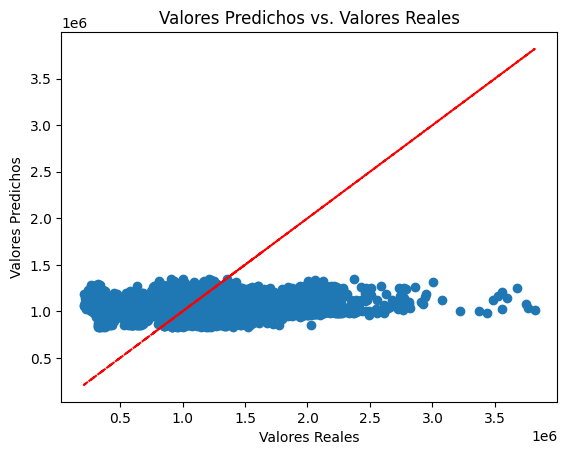

In [42]:
# Graficar los valores predichos vs los valores reales
plt.scatter(y, predicciones)
plt.plot(y, y, color='red', linestyle='--')  # Línea de referencia (y = x)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Reales')
plt.show()

Al graficar los valores predichos frente a los valores reales, puedes observar cómo se ajusta el modelo a los datos. Si los valores predichos están cerca de la línea de referencia (y = x) y están distribuidos de manera uniforme alrededor de esta línea, indica que el modelo está capturando correctamente la relación entre las variables independientes y la variable dependiente. En otras palabras, los valores predichos se acercan a los valores reales.

Sin embargo, si hay una dispersión significativa de los puntos alrededor de la línea de referencia y los valores predichos se alejan sistemáticamente de los valores reales, puede indicar que el modelo no se ajusta bien a los datos y puede haber una falta de precisión en las predicciones.

**Conclusion de modelo**

Como modelo sugerido, enfoqué el análisis en un modelo de regresión lineal, que es un enfoque econométrico, utilizando el paquete statsmodels. Por lo tanto, interpretaremos los coeficientes del modelo.

Interpretación de los coeficientes:

Los coeficientes representan el cambio promedio en la variable dependiente (Ventas_semanales) por cada unidad de cambio en las variables independientes, manteniendo constantes las otras variables.
Para interpretar los coeficientes, es importante considerar el contexto del problema y las características específicas de los datos.
Sin embargo, si hubieras optado por un enfoque de machine learning, como el uso de algoritmos de aprendizaje automático, la interpretación sería diferente. En lugar de interpretar coeficientes, el enfoque de machine learning se basa en la capacidad predictiva y la importancia relativa de las variables.

Para determinar las variables que tienen mayor poder explicativo en un enfoque de machine learning, podemos utilizar técnicas como la importancia de características (feature importance) o el análisis de contribución (feature contribution). Estas técnicas evalúan la contribución de cada variable en el proceso de predicción y ayudan a identificar las variables más relevantes para el modelo.